In [3]:
import pickle
import collections as col
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
target_cols = [
    'toxic', 'severe_toxic', 'obscene', 'threat', 
    'insult', 'identity_hate'
]

In [8]:
import imp
import src.fasttext

In [5]:
with open("/home/zphang/data/ml_proj/X_train_os.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("/home/zphang/data/ml_proj/y_train_os.pkl", "rb") as f:
    y_train = pickle.load(f)
with open("/home/zphang/data/ml_proj/X_val.pkl", "rb") as f:
    X_val = pickle.load(f)
with open("/home/zphang/data/ml_proj/y_val.pkl", "rb") as f:
    y_val = pickle.load(f)
with open("/home/zphang/data/ml_proj/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("/home/zphang/data/ml_proj/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

In [9]:
go(X_train, y_train, target_cols, "/home/zphang/data/ml_proj/fasttext/train")

In [10]:
go(X_val, y_val, target_cols, "/home/zphang/data/ml_proj/fasttext/val")

In [11]:
go(X_test, y_test, target_cols, "/home/zphang/data/ml_proj/fasttext/test")

In [13]:
for column in target_cols:
    print(f"""~/code/gits/ml_fol/fastText/fasttext supervised \
	-input /home/zphang/data/ml_proj/fasttext/train_{column}.txt \
	-output /home/zphang/data/ml_proj/fasttext/{column}_model""")

~/code/gits/ml_fol/fastText/fasttext supervised 	-input /home/zphang/data/ml_proj/fasttext/train_toxic.txt 	-output /home/zphang/data/ml_proj/fasttext/toxic_model
~/code/gits/ml_fol/fastText/fasttext supervised 	-input /home/zphang/data/ml_proj/fasttext/train_severe_toxic.txt 	-output /home/zphang/data/ml_proj/fasttext/severe_toxic_model
~/code/gits/ml_fol/fastText/fasttext supervised 	-input /home/zphang/data/ml_proj/fasttext/train_obscene.txt 	-output /home/zphang/data/ml_proj/fasttext/obscene_model
~/code/gits/ml_fol/fastText/fasttext supervised 	-input /home/zphang/data/ml_proj/fasttext/train_threat.txt 	-output /home/zphang/data/ml_proj/fasttext/threat_model
~/code/gits/ml_fol/fastText/fasttext supervised 	-input /home/zphang/data/ml_proj/fasttext/train_insult.txt 	-output /home/zphang/data/ml_proj/fasttext/insult_model
~/code/gits/ml_fol/fastText/fasttext supervised 	-input /home/zphang/data/ml_proj/fasttext/train_identity_hate.txt 	-output /home/zphang/data/ml_proj/fasttext/iden

In [14]:
for column in target_cols:
    print(f"""~/code/gits/ml_fol/fastText/fasttext predict-prob \
	/home/zphang/data/ml_proj/fasttext/{column}_model.bin \
	/home/zphang/data/ml_proj/fasttext/test_{column}.txt \
	2 > /home/zphang/data/ml_proj/fasttext/testpred_{column}.txt""")

~/code/gits/ml_fol/fastText/fasttext predict-prob 	/home/zphang/data/ml_proj/fasttext/toxic_model.bin 	/home/zphang/data/ml_proj/fasttext/test_toxic.txt 	2 > /home/zphang/data/ml_proj/fasttext/testpred_toxic.txt
~/code/gits/ml_fol/fastText/fasttext predict-prob 	/home/zphang/data/ml_proj/fasttext/severe_toxic_model.bin 	/home/zphang/data/ml_proj/fasttext/test_severe_toxic.txt 	2 > /home/zphang/data/ml_proj/fasttext/testpred_severe_toxic.txt
~/code/gits/ml_fol/fastText/fasttext predict-prob 	/home/zphang/data/ml_proj/fasttext/obscene_model.bin 	/home/zphang/data/ml_proj/fasttext/test_obscene.txt 	2 > /home/zphang/data/ml_proj/fasttext/testpred_obscene.txt
~/code/gits/ml_fol/fastText/fasttext predict-prob 	/home/zphang/data/ml_proj/fasttext/threat_model.bin 	/home/zphang/data/ml_proj/fasttext/test_threat.txt 	2 > /home/zphang/data/ml_proj/fasttext/testpred_threat.txt
~/code/gits/ml_fol/fastText/fasttext predict-prob 	/home/zphang/data/ml_proj/fasttext/insult_model.bin 	/home/zphang/data/

In [16]:
pred_dict = col.OrderedDict()
for label in target_cols:
    ls = []
    with open(f"/home/zphang/data/ml_proj/fasttext/testpred_{label}.txt", "r") as f:
        print(f"/home/zphang/data/ml_proj/fasttext/testpred_{label}.txt")
        for line in f.readlines():
            for raw_tup in line.strip().split("__label__")[1:]:
                tup = raw_tup.strip().split()
                if tup[0] == label:
                    ls.append(float(tup[1]))
    pred_dict[label] = ls

/home/zphang/data/ml_proj/fasttext/testpred_toxic.txt
/home/zphang/data/ml_proj/fasttext/testpred_severe_toxic.txt
/home/zphang/data/ml_proj/fasttext/testpred_obscene.txt
/home/zphang/data/ml_proj/fasttext/testpred_threat.txt
/home/zphang/data/ml_proj/fasttext/testpred_insult.txt
/home/zphang/data/ml_proj/fasttext/testpred_identity_hate.txt


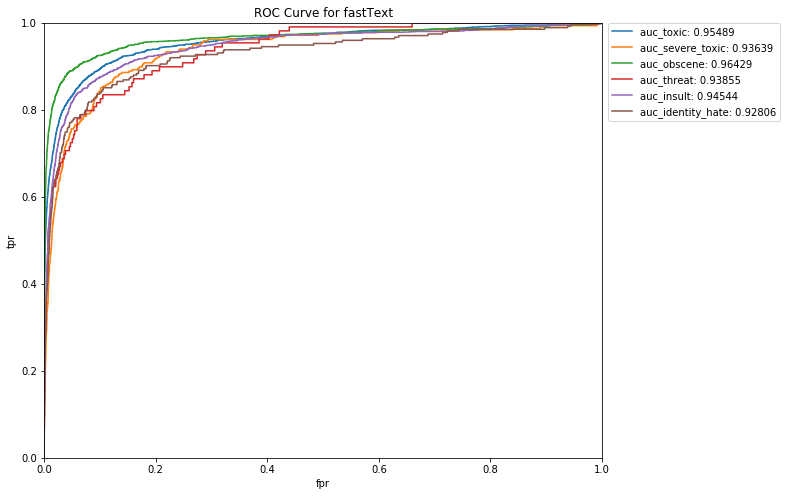

In [19]:
auc_rf_fasttext = []
plt.figure(figsize=(10,8))
for i, col in enumerate(target_cols):
    fpr, tpr, threshold = roc_curve(y_test[col], pred_dict[col])
    auc_value = auc(fpr, tpr)
    auc_rf_fasttext.append(auc_value)
    plt.plot(fpr, tpr, label='{}: {:0.5f}'.format('auc_'+col, auc_value))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve for fastText')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()